In [1]:
import pandas as pd               #For data loading and data manipulation
import seaborn as sns             #For data visualization 
import matplotlib.pyplot as plt   #For data visualization
%matplotlib inline
import re

import nltk
from nltk.corpus import stopwords #For stopword removals

import string                     #For Punctuations

import numpy as np


In [5]:
# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)

# Your code to read the DataFrame
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')



# df = pd.read_csv('train.csv', encoding='utf-8')
# df_test = pd.read_csv('test_with_no_labels.csv', encoding='utf-8')


In [6]:
df.head(10)

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577
6,1,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,294933
7,1,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",992717
8,1,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",664510
9,1,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,260471


From the data snippet shown above, we see that the message column contains some noise (stop words, puntuations, mentions, hashtags and even urls). We need to deal with the noise before proceeding to analyze the data.

In [5]:
df.shape

(15819, 3)

In [10]:
df.info() #Let's see our datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


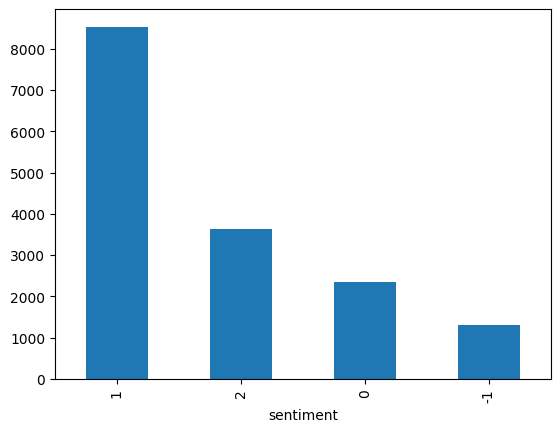

In [13]:
#Plot a barg graph to show the distribution of the sentiments
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

## **DATA PREPROCESSING**

### **NOISE REMOVAL**

**REMOVAL OF STOPWORDS**

In [7]:
df_train = df.copy() #Let us make a copy of our dataframe to avoid modifying the original dataframe

In [8]:
#To get a list of english stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
 clean_texts = []

for text in df_train['message']:
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    clean_text = ' '.join(filtered_words)
    clean_texts.append(clean_text)


In [10]:
# Add clean_texts to the dataframe
df_train['clean_message'] = clean_texts
df_train.head()

,sentiment,message,tweetid,clean_message
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,"PolySciMajor EPA chief think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,RT @RawStory: Researchers say three years act climate change it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,#TodayinMaker# WIRED : 2016 pivotal year war climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,"RT @SoyNovioDeTodas: 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight"


**QUESTION**
Should we drop the original message column at this point? Or would it be useful for future reference?

**REMOVE URLS**

In [11]:
#Remove urls and replace with 'url'
 
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'

subs_url = r'url'

df_train['clean_message'] = df_train['clean_message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [13]:
df_train['clean_message'].iloc[2]

'RT @RawStory: Researchers say three years act climate change it’s late url url…'

**REMOVE PUNCTUATIONS**

In [14]:
#Convert message to lower case
df_train['clean_message'] = df_train['clean_message'].str.lower()

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [15]:
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])


df_train['clean_message'] = df_train['clean_message'].apply(remove_punctuation)
df_train['clean_message'].iloc[9]

'rt paigetweedy offense… like… believe… global warming………'

In [16]:
df_train['clean_message'].iloc[2]

'rt rawstory researchers say three years act climate change it’s late url url…'

Despite removing puntuations, we still observe some curly quotation marks (’) and repeated punctuations (.....).

Let's deal with these using regular expression(regex)

In [17]:
def clean_text(text):
    text = re.sub(r'[^\w\s"“”]', '', text)  # Remove non-alphanumeric characters and curly quotation marks
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'([!?.])\1+', r'\1', text)  # Remove repeated punctuation marks
    return text.strip()

# Apply the clean_text function to the 'message' column
df_train['clean_message'] = df_train['clean_message'].apply(clean_text)
df_train['clean_message'].iloc[2]

'rt rawstory researchers say three years act climate change its late url url'

In [18]:
df_train['clean_message'].iloc[9]

'rt paigetweedy offense like believe global warming'

Looks like our data has been delivered of every noise.......

### **DATA NORMALIZATION**

**TOKENIZATION**

In [19]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['clean_message'].apply(tokeniser.tokenize)

In [20]:
df_train['tokens'].iloc[2]

['rt',
 'rawstory',
 'researchers',
 'say',
 'three',
 'years',
 'act',
 'climate',
 'change',
 'its',
 'late',
 'url',
 'url']

**STEMMING**

In [21]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

stemmer = SnowballStemmer('english')

In [23]:
def df_train_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [24]:
#Apply stemming function
df_train['stem'] = df_train['tokens'].apply(df_train_stemmer, args=(stemmer, ))

In [25]:
for i, t in enumerate(df_train.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[2]['stem'][i]))

rt                   --> rt        
rawstory             --> rawstori  
researchers          --> research  
say                  --> say       
three                --> three     
years                --> year      
act                  --> act       
climate              --> climat    
change               --> chang     
its                  --> it        
late                 --> late      
url                  --> url       
url                  --> url       


In [26]:
df_train.head()

,sentiment,message,tweetid,clean_message,tokens,stem
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warming and wait what url via mashable,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, and, wait, what, url, via, mashable]","[polyscimajor, epa, chief, think, carbon, dioxid, main, caus, global, warm, and, wait, what, url, via, mashabl]"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, warming]","[like, lack, evid, anthropogen, global, warm]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say three years act climate change its late url url,"[rt, rawstory, researchers, say, three, years, act, climate, change, its, late, url, url]","[rt, rawstori, research, say, three, year, act, climat, chang, it, late, url, url]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmaker wired 2016 pivotal year war climate change url,"[todayinmaker, wired, 2016, pivotal, year, war, climate, change, url]","[todayinmak, wire, 2016, pivot, year, war, climat, chang, url]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetodas 2016 racist sexist climate change denying bigot leading polls electionnight,"[rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]","[rt, soynoviodetoda, 2016, racist, sexist, climat, chang, deni, bigot, lead, poll, electionnight]"


### **Lemmatization**

In [28]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [29]:
def df_train_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]  

In [30]:
#Apply Lemmatization function
df_train['lemma'] = df_train['tokens'].apply(df_train_lemma, args=(lemmatizer, ))

In [32]:
for i, t in enumerate(df_train.iloc[2]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[2]['lemma'][i]))

rt                   --> rt        
rawstory             --> rawstory  
researchers          --> researcher
say                  --> say       
three                --> three     
years                --> year      
act                  --> act       
climate              --> climate   
change               --> change    
its                  --> it        
late                 --> late      
url                  --> url       
url                  --> url       


In [31]:
df_train.head()

,sentiment,message,tweetid,clean_message,tokens,stem,lemma
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221,polyscimajor epa chief think carbon dioxide main cause global warming and wait what url via mashable,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, and, wait, what, url, via, mashable]","[polyscimajor, epa, chief, think, carbon, dioxid, main, caus, global, warm, and, wait, what, url, via, mashabl]","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, and, wait, what, url, via, mashable]"
1,1,It's not like we lack evidence of anthropogenic global warming,126103,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, warming]","[like, lack, evid, anthropogen, global, warm]","[like, lack, evidence, anthropogenic, global, warming]"
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562,rt rawstory researchers say three years act climate change its late url url,"[rt, rawstory, researchers, say, three, years, act, climate, change, its, late, url, url]","[rt, rawstori, research, say, three, year, act, climat, chang, it, late, url, url]","[rt, rawstory, researcher, say, three, year, act, climate, change, it, late, url, url]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736,todayinmaker wired 2016 pivotal year war climate change url,"[todayinmaker, wired, 2016, pivotal, year, war, climate, change, url]","[todayinmak, wire, 2016, pivot, year, war, climat, chang, url]","[todayinmaker, wired, 2016, pivotal, year, war, climate, change, url]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954,rt soynoviodetodas 2016 racist sexist climate change denying bigot leading polls electionnight,"[rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]","[rt, soynoviodetoda, 2016, racist, sexist, climat, chang, deni, bigot, lead, poll, electionnight]","[rt, soynoviodetodas, 2016, racist, sexist, climate, change, denying, bigot, leading, poll, electionnight]"


In [ ]:
#DROP MESSAGE COLUMN

#df_train = df_train.drop(['message'], axis = 1)

## **EDA**

### **TEXT FEATURE EXTRACTION**

**BAG OF WORDS**

In [ ]:
# type_labels = list(mbti.type.unique()) 

# personality = {}
# for pp in type_labels:
#     df = all_mbti.groupby('type')
#     personality[pp] = {} 
#     for row in df.get_group(pp)['tokens']:
#         personality[pp] = bag_of_words_count(row, personality[pp])  

In [ ]:
sentiment_labels = list(df.sentiment.unique()) #retrieves the unique values of the 'sentiment' column

category = {} #initializes an empty dictionary to store the sentiment categories and their corresponding word counts
for ct in sentiment_labels_labels:
    df_bow = df.groupby('sentiment') # groups the DataFrame by the 'sentiment' column
    category[ct] = {} #initializes an empty dictionary within the personality dictionary for the current personality type
    for row in df_bow.get_group(ct)['tokens']:
        category[ct] = bag_of_words_count(row, category[ct])  

In [ ]:
all_words = set()
for ct in sentiment_labels:
    for word in category[ct]:
        all_words.add(word)

In [ ]:
# personality['all'] = {}
# for pp in type_labels:    
#     for word in all_words:
#         if word in personality[pp].keys():
#             if word in personality['all']:
#                 personality['all'][word] += personality[pp][word]
#             else:
#                 personality['all'][word] = personality[pp][word]

N-grams

In [39]:
from nltk.util import ngrams

In [40]:
ngram = [x for x in ngrams('Classification is a great machine learning technique to learn'.split(' '), 2)]
print(len(ngram))

8


In [ ]:
# or
# # Sample code to remove noisy words from a text

# noise_list = ["is", "a", "this", "..."] 
# def _remove_noise(input_text):
#     words = input_text.split() 
#     noise_free_words = [word for word in words if word not in noise_list] 
#     noise_free_text = " ".join(noise_free_words) 
#     return noise_free_text

# print(_remove_noise("this is a sample text"))